# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp310-cp310-linux_x86_64.whl
  Obtaining dependency information for urllib3<1.27,>=1.25.4 from https://files.pythonhosted.org/packages/c5/05/c214b32d21c0b465506f95c4f28ccbcba15022e000b043b72b3df7728471/urllib3-1.26.16-py2.py3-none-any.whl.metadata
  Using cached urllib3-1.26.16-py2.py3-none-any.whl.metadata (48 kB)
Using cached urllib3-1.26.16-py2.py3-none-any.whl (143 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.3.2 which is incompatible.


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [6]:
# #TODO: Fetch and upload the data to AWS S3

# # Command to download and unzip data
# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# !unzip dogImages.zip

In [4]:
# General macros
session = sagemaker.Session()
bucket= session.default_bucket()
print("Default Bucket: {}".format(bucket))
region = session.boto_region_name
print("AWS Region: {}".format(region))
role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

Default Bucket: sagemaker-us-east-1-395392234776
AWS Region: us-east-1
RoleArn: arn:aws:iam::395392234776:role/service-role/AmazonSageMaker-ExecutionRole-20230804T110681


In [ ]:
# # Upload dog images to S3 bucket
# import os
# bucket_path = "s3://"+ bucket
# database_path = bucket_path + "/dogImages/"
# os.environ["DATABASE_PATH"] = database_path
# !aws s3 cp dogImages ${DATABASE_PATH} --recursive

upload: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg to s3://sagemaker-us-east-1-395392234776/dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hound_00125.jpg to s3://sagemaker-us-east-1-395392234776/dogImages/test/002.Afghan_hound/Afghan_hound_00125.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg to s3://sagemaker-us-east-1-395392234776/dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg to s3://sagemaker-us-east-1-395392234776/dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hound_00141.jpg to s3://sagemaker-us-east-1-395392234776/dogImages/test/002.Afghan_hound/Afghan_hound_00141.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg to s3://sagemaker-us-east-1-395392234776/dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg
upload: dogImages/test/001.Aff

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [5]:
hyperparameter_ranges = {
    'lr': ContinuousParameter(0.001, 0.1),
    'batch_size': CategoricalParameter([16 ,32, 64]),
    'epochs': IntegerParameter(2, 6)
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [6]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(entry_point = 'hpo.py',
                                    base_job_name = 'dog-classification-hpo',
                                    role = role,
                                    instance_count = 1,
                                    instance_type = 'ml.m5.2xlarge', 
                                    py_version = 'py36',
                                    framework_version = '1.8')

tuner = HyperparameterTuner(estimator,
                            objective_metric_name,
                            hyperparameter_ranges,
                            metric_definitions,
                            max_jobs = 4,
                            max_parallel_jobs = 2,
                            objective_type = objective_type)

In [7]:
# TODO: Fit your HP Tuner
from time import process_time
tic = process_time()

tuner.fit({
'train': "s3://sagemaker-us-east-1-395392234776/dogImages/",     
#'valid': path + '/valid',  
#'test': path + '/test'     
}, wait=True)

toc = process_time()
print(toc-tic)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


Using provided s3_resource
..................................................................................................................!
0.6536598259999997


In [8]:
#best_estimator = #TODO
best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

lr_b = float(best_estimator.hyperparameters()["lr"])
epochs_b = int(best_estimator.hyperparameters()['epochs'])
#batch_size_b = int(best_estimator.hyperparameters()['batch_size']
batch_size_b = int(best_estimator.hyperparameters()['batch_size'].replace('"', ""))

print("Best hyperparameters from hpo:")
print("lr:",lr_b)
print("batch_size:",batch_size_b)
print("epochs:",epochs_b)

hyperparameters_best = {
    "lr": lr_b,
    "batch_size": batch_size_b,
    "epochs": epochs_b
}


2023-08-24 03:09:41 Starting - Found matching resource for reuse
2023-08-24 03:09:41 Downloading - Downloading input data
2023-08-24 03:09:41 Training - Training image download completed. Training in progress.
2023-08-24 03:09:41 Uploading - Uploading generated training model
2023-08-24 03:09:41 Completed - Resource retained for reuse
Best hyperparameters from hpo:
lr: 0.0011532892435787902
batch_size: 64
epochs: 6


## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [9]:
# TODO: Set up debugging and profiling rules and hooks
#https://knowledge.udacity.com/questions/756730 dijeron la sugerencia del mentor.

from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.debugger import (
    DebuggerHookConfig,
    CollectionConfig,
    ProfilerConfig,
    FrameworkProfile
)

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]
collection_configs=[CollectionConfig(name="CrossEntropyLoss_output_0",parameters={
    "include_regex": "CrossEntropyLoss_output_0", "train.save_interval": "10","eval.save_interval": "1"})]
# ok
profiler_config = ProfilerConfig(
    #system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=1)
)
debugger_config=DebuggerHookConfig(
    collection_configs=collection_configs
)

Framework profiling will be deprecated from tensorflow 2.12 and pytorch 2.0 in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [10]:
# TODO: Create and fit an estimator
estimator = PyTorch(entry_point = 'train_model.py',
                                    role = role,
                                    instance_count=1,
                                    instance_type = 'ml.m5.2xlarge',
                                    py_version = 'py36',
                                    framework_version = '1.6',
                                    hyperparameters = hyperparameters_best,
                                    profiler_config = profiler_config, 
                                    debugger_hook_config = debugger_config, 
                                    rules = rules )
estimator.fit({'train': "s3://sagemaker-us-east-1-395392234776/dogImages/"}, wait=True)

Using provided s3_resource


INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-08-24-03-09-51-807


2023-08-24 03:09:52 Starting - Starting the training job...VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
...............
2023-08-24 03:12:47 Starting - Preparing the instances for training...
2023-08-24 03:13:17 Downloading - Downloading input data......
2023-08-24 03:14:24 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-08-24 03:14:22,569 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-08-24 03:14:22,571 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-08-24 03:14:22,582 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-08-24 03:14:22,584 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-08-24 03:14

In [11]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

print(f"Jobname: {job_name}")
print(f"Client: {client}")
print(f"Description: {description}")

Jobname: pytorch-training-2023-08-24-03-09-51-807
Client: <botocore.client.SageMaker object at 0x7f7ab7d31150>
Description: {'TrainingJobName': 'pytorch-training-2023-08-24-03-09-51-807', 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:395392234776:training-job/pytorch-training-2023-08-24-03-09-51-807', 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/output/model.tar.gz'}, 'TrainingJobStatus': 'Completed', 'SecondaryStatus': 'Completed', 'HyperParameters': {'batch_size': '64', 'epochs': '6', 'lr': '0.0011532892435787902', 'sagemaker_container_log_level': '20', 'sagemaker_job_name': '"pytorch-training-2023-08-24-03-09-51-807"', 'sagemaker_program': '"train_model.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/source/sourcedir.tar.gz"'}, 'AlgorithmSpecification': {'TrainingImage': '763104351884.dkr.ecr.us-east-1.amaz

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [12]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print('Profiler report location: {}'.format(rule_output_path))

Profiler report location: s3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/rule-output


In [13]:
! aws s3 ls {rule_output_path} --recursive

2023-08-24 05:03:05     375500 pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-08-24 05:03:04     223455 pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-08-24 05:03:00        193 pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-08-24 05:03:00        201 pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-08-24 05:03:00       1836 pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-08-24 05:03:00        127 pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-08-24 05:03:00        200 pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-re

In [14]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-report.html to ProfilerReport/profiler-output/profiler-report.html
download: s3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb to ProfilerReport/profiler-output/profiler-report.ipynb
download: s3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/rule-output/ProfilerRep

In [15]:
import os

profiler_report_name = [ rule["RuleConfigurationName"]
                                            for rule in estimator.latest_training_job.rule_job_summary()
                                            if "Profiler" in rule["RuleConfigurationName"]
                                            ][0]

In [16]:
import IPython

IPython.display.HTML(filename= profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [17]:
model_location = estimator.model_data
model_location

's3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/output/model.tar.gz'

In [20]:
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()
from sagemaker.predictor import Predictor
from sagemaker.pytorch import PyTorchModel

class ImgPredictor(Predictor):
    def __init__( self, endpoint_name, sagemaker_session):
        super(ImgPredictor, self).__init__(
            endpoint_name,
            sagemaker_session = sagemaker_session,
            serializer = jpeg_serializer,
            deserializer = json_deserializer
        )
        
pytorch_model = PyTorchModel(model_data = model_location,
                             role = role,
                             entry_point= "deploy_endpoint.py",
                             py_version = "py36",
                             framework_version = "1.6",
                             predictor_cls = ImgPredictor
                            )

predictor = pytorch_model.deploy(initial_instance_count = 1, instance_type = "ml.m5.2xlarge")


INFO:sagemaker:Repacking model artifact (s3://sagemaker-us-east-1-395392234776/pytorch-training-2023-08-24-03-09-51-807/output/model.tar.gz), script artifact (None), and dependencies ([]) into single tar.gz file located at s3://sagemaker-us-east-1-395392234776/pytorch-inference-2023-08-24-05-56-38-329/model.tar.gz. This may take some time depending on model size...
INFO:sagemaker:Creating model with name: pytorch-inference-2023-08-24-05-56-47-840
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2023-08-24-05-56-48-552
INFO:sagemaker:Creating endpoint with name pytorch-inference-2023-08-24-05-56-48-552


-----!

Display Image:


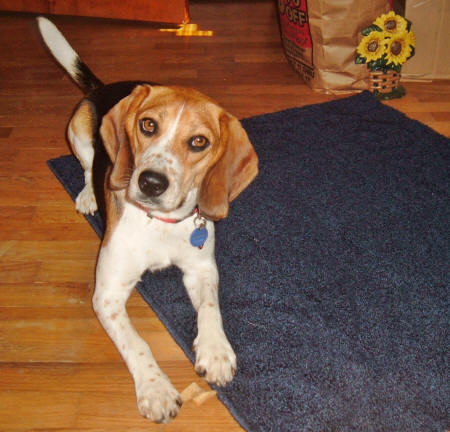

Expected Class: 16
Inference on class: [16] 


Display Image:


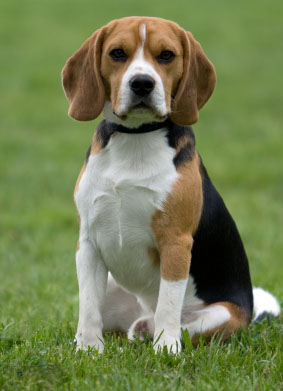

Expected Class: 16
Inference on class: [16] 


Display Image:


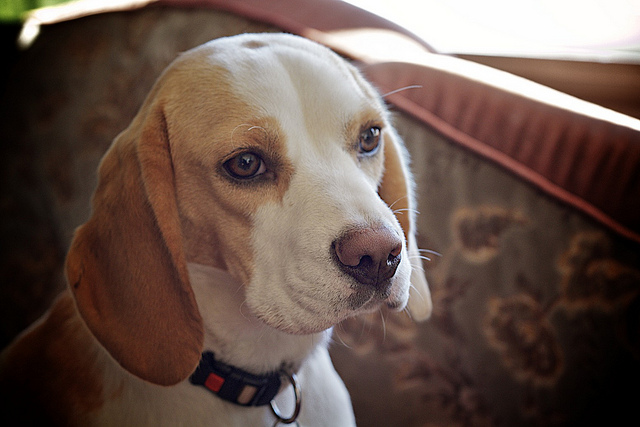

Expected Class: 16
Inference on class: [16] 


Display Image:


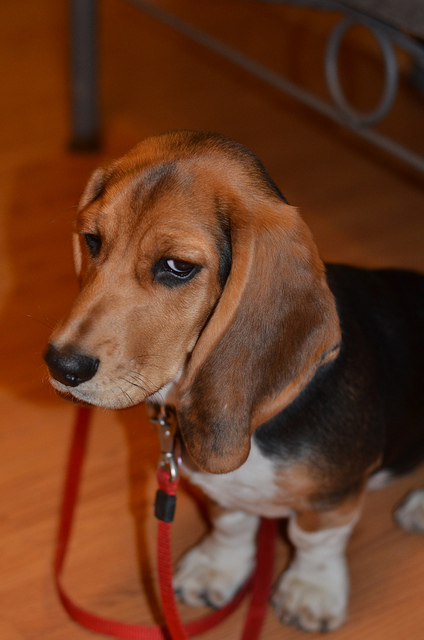

Expected Class: 16
Inference on class: [56] 


Display Image:


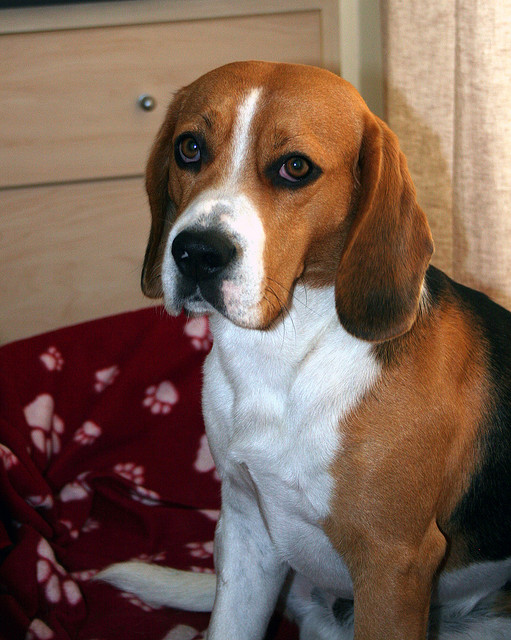

Expected Class: 16
Inference on class: [7] 


Display Image:


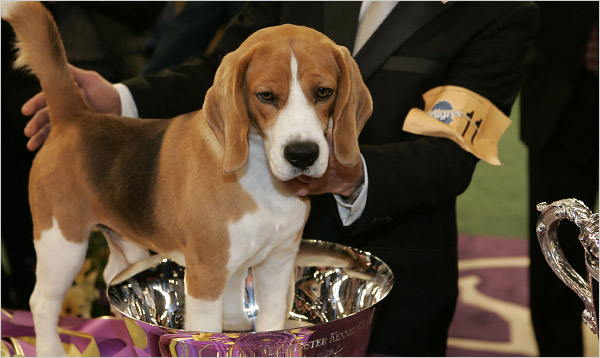

Expected Class: 16
Inference on class: [7] 


Display Image:


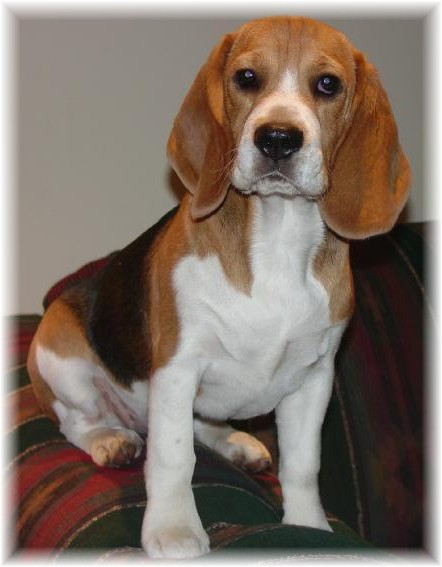

Expected Class: 16
Inference on class: [16] 


Display Image:


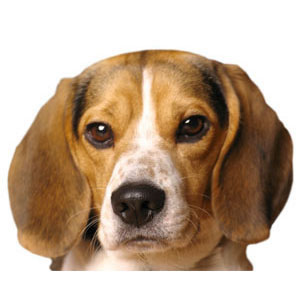

Expected Class: 16
Inference on class: [16] 




In [21]:
from PIL import Image
import io
import os
import numpy as np

test_dir = "./dogImages/test/016.Beagle/"
test_images = ["Beagle_01130.jpg", "Beagle_01141.jpg", "Beagle_01144.jpg", "Beagle_01150.jpg", 
                           "Beagle_01155.jpg", "Beagle_01156.jpg", "Beagle_01196.jpg", "Beagle_01197.jpg"]
test_images_expected_output = 16

for index in range(len(test_images)):
    
    test_image = test_images[index]
    test_file_path = os.path.join(test_dir, test_image) 
    
    with open(test_file_path , "rb") as f:
        payload = f.read()
        print("Display Image:")
        display(Image.open(io.BytesIO(payload)))
        print(f"Expected Class: {test_images_expected_output}")
        response = predictor.predict(payload, initial_args={"ContentType": "image/jpeg"}) 
        predicted_dog_breed = np.argmax(response, 1) + 1
        print(f"Inference on class: {predicted_dog_breed} \n\n")

In [25]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-inference-2023-08-24-05-56-48-552
INFO:sagemaker:Deleting endpoint with name: pytorch-inference-2023-08-24-05-56-48-552


# Image Classification using AWS SageMaker

Use AWS Sagemaker to train a pretrained model that can perform image classification by using the Sagemaker profiling, debugger, hyperparameter tuning and other good ML engineering practices. This can be done on either the provided dog breed classication data set or one of your choice.
Please find below for the overview of the project:

![](project-diagrams.png)

## Project Set Up and Installation
Enter AWS through the gateway in the course and open SageMaker Studio. 
Download the starter files.
Download/Make the dataset available. 

## Dataset
The provided dataset is the dogbreed classification dataset which can be found [here](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).
The project is designed to be dataset independent so if there is a dataset that is more interesting or relevant to your work, you are welcome to use it to complete the project.

### Access
Upload the data to an S3 bucket through the AWS Gateway so that SageMaker has access to the data. 
![](s3_upload_imgs.png)

## Hyperparameter Tuning
We are going to utilize the pre-trained model called Resnet50 and with training and tunning model with learning rate, epochs and batch sizes. 
- learning rate: The learning rate is a hyperparameter that determines the step size at each iteration while updating the weights of a machine learning model during training. It controls how quickly or slowly the model learns from the data. A high learning rate can cause the model to converge quickly, but it may also result in overshooting the optimal solution and lead to instability. On the other hand, a low learning rate may cause the model to converge slowly or get stuck in a suboptimal solution. It's important to choose an appropriate learning rate to ensure efficient and effective model training.
- batch size: The batch size is another hyperparameter in machine learning that determines the number of samples or data points that are used in each iteration of training. During training, the data is divided into smaller subsets or batches, and the model updates its weights based on the average gradient computed from each batch. The batch size can have an impact on the training process and the model's performance. A larger batch size can lead to faster training because more samples are processed in parallel, but it also requires more memory. It can also result in a less noisy estimate of the gradient, which can be beneficial for stable convergence. On the other hand, a smaller batch size requires less memory and allows for more frequent weight updates, which can help the model converge faster. However, it can also introduce more noise into the gradient estimate, which may make the training process less stable. Choosing an appropriate batch size depends on various factors, such as the available computational resources, the size of the dataset, and the complexity of the model. It often involves a trade-off between training speed and model performance.
- epoch: epoch refers to a complete pass or iteration through the entire training dataset during the training process. During each epoch, the model goes through all the training samples and updates its weights based on the computed gradients. To understand the concept of an epoch, let's consider an example. Suppose we have a dataset of 1000 images and we set the batch size to 100. In this case, it would take 10 iterations or batches to cover the entire dataset. If we train the model for 5 epochs, it means that the model will go through the entire dataset 5 times, with each epoch consisting of 10 iterations. The number of epochs is a hyperparameter that determines how many times the model will be trained on the entire dataset. It is important to find the right balance when choosing the number of epochs. Training for too few epochs may result in underfitting, where the model fails to capture the underlying patterns in the data. On the other hand, training for too many epochs may lead to overfitting, where the model becomes too specialized to the training data and performs poorly on unseen data. To determine the optimal number of epochs, it is common to monitor the model's performance on a separate validation dataset and stop training when the performance stops improving or starts to degrade. 

+ hyperparameter_ranges: 
    - learning rate (0.001, 0.1)
    - batch size: 16, 32, 64
    - epochs: (2, 6)
    
+ The best hyperparameters:
    - learning rate: 0.0011532892435787902
    - batch size: 64
    - epochs: 6
![Hyperparam tunning](hpo_1.png)
![Hyperparam tunning details](hpo_2.png)


## Debugging and Profiling
Using the best hyperparameters as mentioned above, we create and finetune a new model and make a summary report on debugging and profiling.

The following table shows a profiling summary of the Debugger built-in rules. The table is sorted by the rules that triggered the most frequently. During your training job, the GPUMemoryIncrease rule was the most frequently triggered. It processed 0 datapoints and was triggered 0 times.

![](summary_debug.JPG)


## Model Deployment
We successfully deployed the model endpoint as below screenshot. And utilize the endpoint to make a test prediction on beagle's breed in folder. We managed to make right 5 over 8 images in the notebook. Absouletely there is a room to improve the model accuracy on this dog's breed specificially. 

- Successfully model trained
![](training_jobs.png)

- Here is the model artifacts stored in S3
![](model_artifacts.png)

- Model endpoint
![](end_point.png)


